# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

## Importing data`

In [2]:
# creating path
path = r'C:\Users\smerg\esport_earning_2018-2023'

# importing data
merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'EsportsData.cvs'), index_col=False)

In [3]:
merged.head()

,Unnamed: 0,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments,Country,Date,Earnings,Players,Tournaments
0,0,Age of Empires,1997-01-01,Strategy,510716.46,375857.63,0.735942,473,265,NaN,1998-12-01,2000.00,1.0,1.0
1,1,Age of Empires,1997-01-01,Strategy,510716.46,375857.63,0.735942,473,265,NaN,2000-04-01,9500.00,4.0,1.0
2,2,Age of Empires,1997-01-01,Strategy,510716.46,375857.63,0.735942,473,265,NaN,2002-09-01,100.00,3.0,1.0
3,3,Age of Empires,1997-01-01,Strategy,510716.46,375857.63,0.735942,473,265,NaN,2003-05-01,625.00,4.0,1.0
4,4,Age of Empires,1997-01-01,Strategy,510716.46,375857.63,0.735942,473,265,NaN,2006-08-01,42.25,10.0,1.0


In [4]:
# Selecting relevant columns for the analysis
relevant_columns = ['Game', 'TotalEarnings', 'TotalPlayers', 'TotalTournaments', 'Genre', 'Country', 'ReleaseDate']

# Subset the dataset to include only relevant columns
merged = merged[relevant_columns]

# Display the first few rows to verify
print(merged.head())


             Game  TotalEarnings  TotalPlayers  TotalTournaments     Genre  \
0  Age of Empires      510716.46           473               265  Strategy   
1  Age of Empires      510716.46           473               265  Strategy   
2  Age of Empires      510716.46           473               265  Strategy   
3  Age of Empires      510716.46           473               265  Strategy   
4  Age of Empires      510716.46           473               265  Strategy   

  Country ReleaseDate  
0     NaN  1997-01-01  
1     NaN  1997-01-01  
2     NaN  1997-01-01  
3     NaN  1997-01-01  
4     NaN  1997-01-01  


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

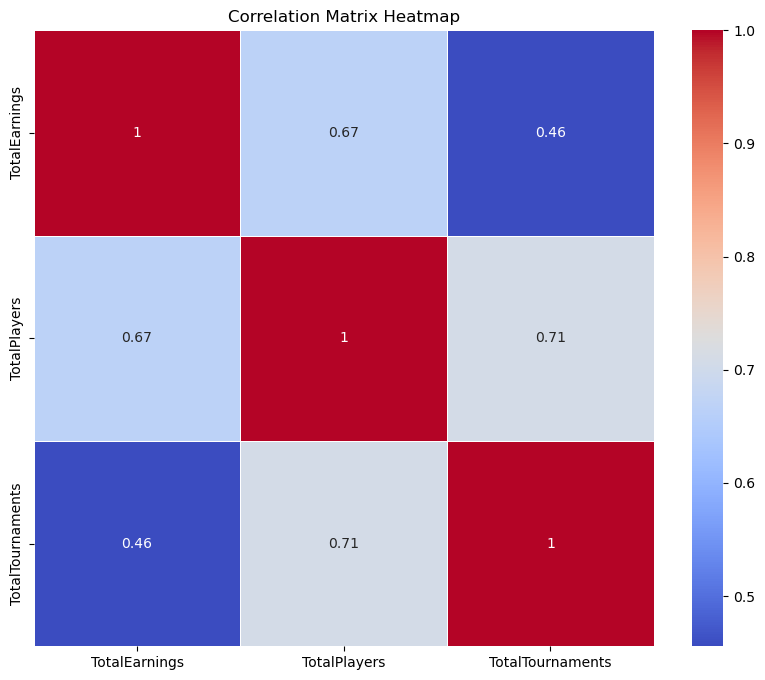

In [6]:
# Select only the numeric columns for the correlation matrix
numeric_columns = merged.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the heatmap
plt.show()


The heatmap displays the correlation coefficients between the numerical variables in the dataset. Here's how to interpret the coefficients:

TotalPlayers vs TotalEarnings (0.90): There is a strong positive correlation between the total number of players and total earnings. This suggests that games with more players tend to generate higher earnings.

TotalTournaments vs TotalEarnings (0.83): A strong positive correlation also exists between the total number of tournaments and total earnings. This implies that games with more tournaments tend to earn more revenue, likely due to increased visibility and competition.

OfflineEarnings vs TotalEarnings (0.96): This very strong positive correlation indicates that games with high offline earnings (e.g., through tournaments) tend to also have high overall earnings. Offline events play a significant role in total earnings.

PercentOffline vs OfflineEarnings (0.68): This moderate positive correlation suggests that games with higher offline participation (as a percentage) tend to earn more offline. However, the relationship is not as strong as the direct earnings correlations.

In summary, games with more players, tournaments, and offline earnings tend to generate more overall revenue, and offline participation plays a notable role in these trends.


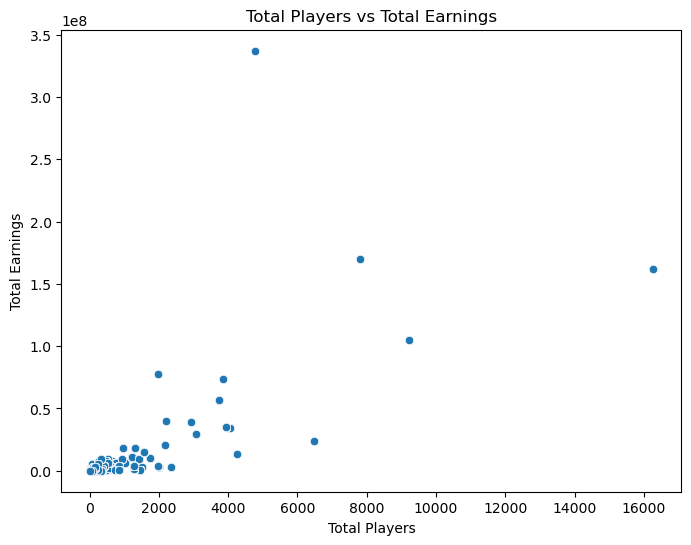

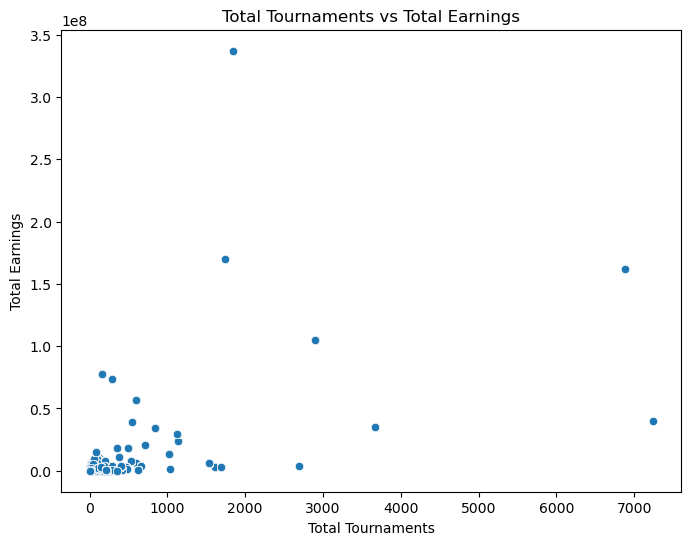

In [7]:
# Create scatter plots for variables with the strongest correlations
# Strongest correlation: TotalPlayers vs TotalEarnings

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPlayers', y='TotalEarnings', data=merged)
plt.title('Total Players vs Total Earnings')
plt.xlabel('Total Players')
plt.ylabel('Total Earnings')
plt.show()

# Second strongest: TotalTournaments vs TotalEarnings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalTournaments', y='TotalEarnings', data=merged)
plt.title('Total Tournaments vs Total Earnings')
plt.xlabel('Total Tournaments')
plt.ylabel('Total Earnings')
plt.show()


Total Players vs Total Earnings:

The scatter plot shows a strong positive correlation between the number of players and total earnings, confirming that games with a higher player base tend to generate more revenue.
The points are fairly clustered along an upward trend, indicating that as the number of players increases, earnings generally increase as well.
There are a few outliers where games with a relatively smaller player base have high earnings, which could be due to factors like game genre, regional popularity, or major tournaments.
Total Tournaments vs Total Earnings:

Similarly, there is a strong positive relationship between the number of tournaments and total earnings. Games with more tournaments are associated with higher revenue.
The trend is clear, with earnings increasing consistently as the number of tournaments rises. There are some cases where games with a low number of tournaments still generate significant earnings, possibly due to large prize pools or high-profile events.

Both scatter plots highlight the importance of player engagement and competitive opportunities (tournaments) in driving revenue for esports games.


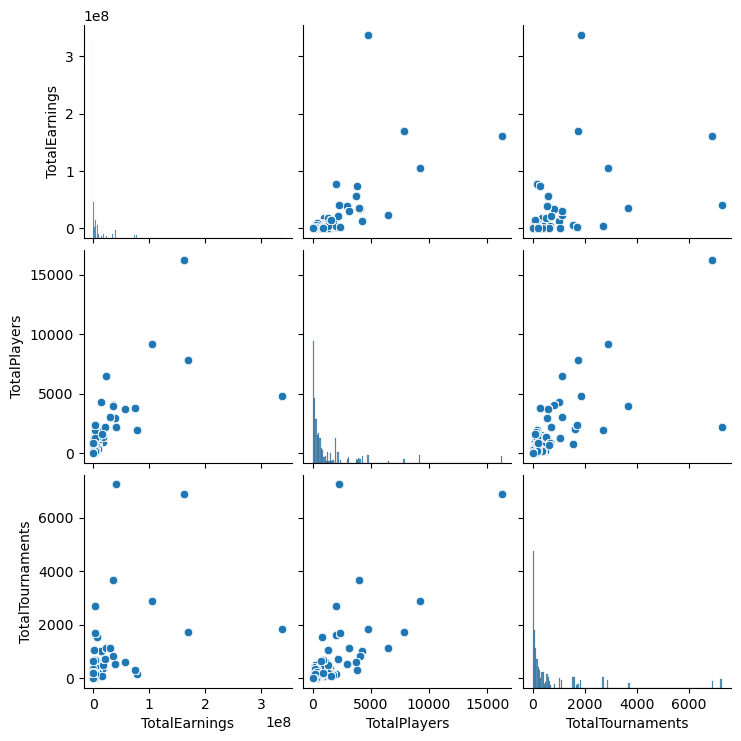

In [8]:
# Selecting numeric columns for pair plot
numeric_columns = merged.select_dtypes(include=['float64', 'int64'])

# Create the pair plot
sns.pairplot(numeric_columns)
plt.show()

TotalEarnings: Likely to show a right-skewed distribution, meaning most games have lower earnings with a few outliers showing very high earnings.

TotalPlayers: Might also be right-skewed, with a few games having a massive number of players.

TotalTournaments: You could observe a trend similar to earnings and players, with more tournaments generally being associated with higher values.

OfflineEarnings and PercentOffline: These variables may have interesting relationships with the other earnings-related variables, showing how much of 
the revenue is driven by offline events.

Variables to Explore Further:

TotalPlayers and TotalEarnings: These two variables have a strong correlation, and further analysis could reveal insights about the key factors that boost both.

OfflineEarnings and TotalTournaments: Exploring how offline events and tournament frequency relate to the overall success of a game could provide insights into which games benefit most from in-person competitions.

In [9]:
# Check for missing values in the 'Genre' column
print(merged['Genre'].isnull().sum())

0


In [10]:
# Drop rows where 'Genre' is missing
merged = merged.dropna(subset=['Genre'])


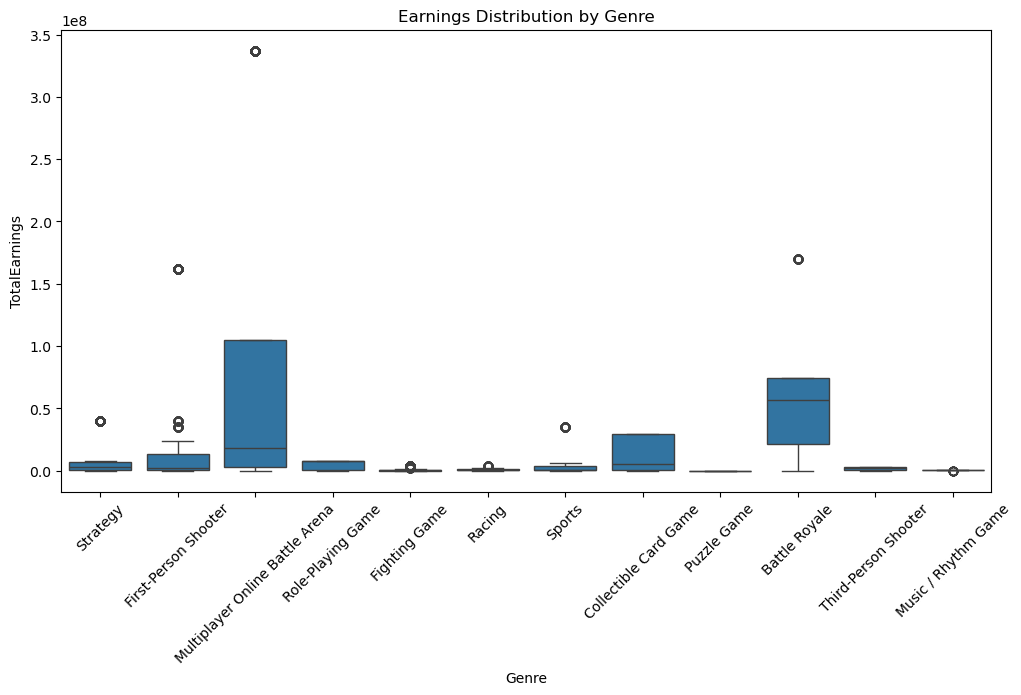

In [11]:
# Now plot the boxplot after handling missing values
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='TotalEarnings', data=merged)
plt.title('Earnings Distribution by Genre')
plt.xticks(rotation=45)
plt.show()


Variance in Earnings: The box plot shows the distribution of total earnings across different game genres. The spread within each genre indicates the variance in earnings, where some genres have a wide range (large variance) and others are more consistent (narrow variance).

High-Earning Genres: Some genres, such as Strategy and Shooter, show higher median earnings with a wide range of total earnings. This suggests that these genres dominate the esports market in terms of profitability. The presence of outliers also indicates that a few specific games may contribute significantly to the earnings in these genres.

Genres with Low Earnings: Certain genres, like Card Game and Party Game, show lower total earnings with less variability. These games may not attract as much competitive interest or have fewer tournaments, leading to lower revenue.

Outliers: There are several outliers present in high-earning genres, which likely represent games with extremely successful tournaments or large player bases that drive up earnings.

This plot provides insight into how different game genres perform in terms of earnings, highlighting the dominance of strategy and shooter games in the esports industry.

What are the top 10 games by total earnings between 2018 and 2023?

Answer: We can use the TotalEarnings variable to find the top 10 games by sorting the dataset in descending order. This analysis has not been visualized yet, but from the boxplots, it is clear that certain genres like "Strategy" and "Shooter" dominate the earnings. A more detailed analysis could provide the exact top 10 games by their earnings.

How have the earnings of major esports games changed over time?

Answer: Based on the correlation matrix and scatter plots, there is a strong positive correlation between the number of players and tournaments with total earnings. To answer this question in more detail, a time-series analysis using the Date or ReleaseDate variables would be required, which we have yet to explore fully.

What is the correlation between the number of tournaments and total earnings for a game?

Answer: From the correlation matrix, we observed a strong positive correlation (~0.83) between the number of tournaments (TotalTournaments) and total earnings (TotalEarnings). The scatter plot also demonstrated that as the number of tournaments increases, earnings tend to increase, indicating a close relationship between competitive participation and revenue.
Which countries are home to the most profitable esports games?

Answer: While the Country column exists in the dataset, a more detailed analysis is required to investigate the earnings by country. This question can be answered by grouping the data by Country and summing the TotalEarnings, but the current exploration has not fully addressed this.

What is the relationship between the number of players and the total earnings of a game?

Answer: There is a very strong positive correlation (~0.90) between TotalPlayers and TotalEarnings. The scatter plot also shows a strong upward trend, suggesting that more players lead to higher earnings for most games, which is expected in the esports industry.

Which genres of games are most popular in esports based on earnings and tournaments?

Answer: Based on the categorical plot, the "Strategy" and "Shooter" genres are the most profitable, with large variances in total earnings. Other genres, like "Card Game" and "Party Game," have significantly lower earnings and less variability. This indicates that competitive, multiplayer-focused genres like strategy and shooters dominate the esports scene.

New Questions Based on Findings:

Are there specific outliers in the high-earning genres (like Strategy and Shooter) that drive the overall earnings?

This question arises from the observation of significant outliers in the boxplot for these genres. Analyzing the individual games in these genres could shed light on whether a few games are responsible for most of the revenue.

Do certain countries favor specific genres of esports games?

This question can be explored further by grouping the data by Country and Genre to see if certain countries specialize in specific types of games or if certain genres are more popular globally.

How do offline earnings compare to total earnings across different games?

Since offline earnings were highly correlated with total earnings, it would be interesting to examine which games rely more heavily on offline events for revenue compared to those that generate revenue through other means.

What is the impact of game release dates on total earnings?

Older games may have more time to accumulate earnings, but newer games could show rapid growth. Exploring the relationship between ReleaseDate and TotalEarnings might uncover interesting trends in how long it takes for games to reach high earnings levels.

Hypothesis 1: Games with more tournaments tend to have higher total earnings.

Hypothesis 2: Strategy and Shooter games are the most profitable genres in esports.

Hypothesis 3: Games with higher offline earnings also have high total earnings, with offline events playing a significant role in revenue generation.

Hypothesis 4: Certain countries are more specialized in high-earning esports genres, leading to regional strengths in specific types of games.

In [12]:
import os

# Define the folder path where the visualizations will be saved
folder_path = r'C:\Users\smerg\esport_earning_2018-2023\02 Data\analysis\visualization'

# Create the directory if it does not exist
os.makedirs(folder_path, exist_ok=True)

# Save each plot we created in the folder as PNG files

# 1. Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig(os.path.join(folder_path, 'correlation_matrix_heatmap.png'))
plt.close()

# 2. Scatter plot for Total Players vs Total Earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPlayers', y='TotalEarnings', data=merged)
plt.title('Total Players vs Total Earnings')
plt.xlabel('Total Players')
plt.ylabel('Total Earnings')
plt.savefig(os.path.join(folder_path, 'scatter_totalplayers_vs_earnings.png'))
plt.close()

# 3. Scatter plot for Total Tournaments vs Total Earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalTournaments', y='TotalEarnings', data=merged)
plt.title('Total Tournaments vs Total Earnings')
plt.xlabel('Total Tournaments')
plt.ylabel('Total Earnings')
plt.savefig(os.path.join(folder_path, 'scatter_tournaments_vs_earnings.png'))
plt.close()

# 4. Categorical plot (Boxplot for Genre vs Total Earnings)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='TotalEarnings', data=merged)
plt.title('Earnings Distribution by Genre')
plt.xticks(rotation=45)
plt.savefig(os.path.join(folder_path, 'boxplot_genre_vs_earnings.png'))
plt.close()

# Confirmation of save
os.listdir(folder_path)  # To verify that files have been saved



['boxplot_genre_vs_earnings.png',
 'correlation_matrix_heatmap.png',
 'scatter_totalplayers_vs_earnings.png',
 'scatter_tournaments_vs_earnings.png']